In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

# Phân tích đa biến trên 2 nguồn dữ liệu: 
# Tìm 10 kệ hàng (aisle) bán được nhiều nhất

# 0. Load dữ liệu products theo từng order

In [2]:
# Header: order_id,product_id,add_to_cart_order,reordered
csv_data = np.genfromtxt('instacart-data/order_products__train.csv', skip_header=1, 
                         delimiter=',', dtype=np.int)
print("Đã load xong!")
print(csv_data.shape)

Đã load xong!
(1384617, 4)


In [3]:
print(csv_data.shape)
print(csv_data.T[-1])

(1384617, 4)
[1 1 0 ... 1 1 1]


**Phân tích theo product_id**

In [4]:
product_id = csv_data.T[1]
vals, count = np.unique(product_id, return_counts=True)
print(vals)
print(count)
print(vals.size)

[    1     2     3 ... 49686 49687 49688]
[76  4  6 ...  7  1  4]
39123


## Load dữ liệu về thông tin của từng product theo tên, kệ hàng, gian hàng

In [5]:
import csv
file_path = 'instacart-data/products.csv'
ds_product_id = []
ds_product_name = []
ds_aisle_id = []
with open(file_path, newline='') as csv_file:
    data_csv = csv.reader(csv_file, delimiter=',')
    header = next(data_csv)
    print(header)

    for row in data_csv:
        ds_product_id.append(np.int(row[0]))
        ds_product_name.append(row[1])
        ds_aisle_id.append(np.int(row[2]))
print(ds_product_name[0:10])
print(ds_product_id[0:10])
print(ds_aisle_id[0:10])

['product_id', 'product_name', 'aisle_id', 'department_id']
['Chocolate Sandwich Cookies', 'All-Seasons Salt', 'Robust Golden Unsweetened Oolong Tea', 'Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce', 'Green Chile Anytime Sauce', 'Dry Nose Oil', 'Pure Coconut Water With Orange', "Cut Russet Potatoes Steam N' Mash", 'Light Strawberry Blueberry Yogurt', 'Sparkling Orange Juice & Prickly Pear Beverage']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[61, 104, 94, 38, 5, 11, 98, 116, 120, 115]


In [6]:
# Warning: có thể treo máy nếu chạy full
order_aisle_id = []
for item in product_id[0:1000]:
    aid = ds_aisle_id[ds_product_id.index(item)]
    order_aisle_id.append(aid)
print(len(order_aisle_id))

1000


**Cách sử dụng np.where để tìm giá trị tương ứng từ 3 mảng**

In [7]:
a = np.array([20,20,30,40,50,20,30,40,50,20,30,40,50,20,30,40,50])
b = np.array([10,20,30,40,50])
c = np.array([55,44,33,22,11])
np.where(a[:, None] == b)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array([1, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]))

In [8]:
a[:, None]

array([[20],
       [20],
       [30],
       [40],
       [50],
       [20],
       [30],
       [40],
       [50],
       [20],
       [30],
       [40],
       [50],
       [20],
       [30],
       [40],
       [50]])

In [9]:
b[None, :]

array([[10, 20, 30, 40, 50]])

In [10]:
a[:, None] == b

array([[False,  True, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True],
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True],
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True],
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True]])

In [11]:
idx = np.where(a[:, None] == b[None, :])[1]
print(idx)
c[idx]

[1 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]


array([44, 44, 33, 22, 11, 44, 33, 22, 11, 44, 33, 22, 11, 44, 33, 22, 11])

**Áp dụng np.where để tìm aisle_id tương ứng với từng sản phẩm trong đơn hàng**

In [12]:
print(product_id[:,None].shape)
print(np.array(ds_product_id)[None, :].shape)

(1384617, 1)
(1, 49688)


In [13]:
a = product_id[0:50000]
b = np.array(ds_product_id)
# print(a)
# print(b)
idx = np.where(a[:, None] == b[None, :])[1]
print(idx.size)

50000


In [14]:
np.array(ds_aisle_id)[idx]

array([120, 108,  83, ..., 107,  24, 120])

In [15]:
ds_aisle_id = np.array(ds_aisle_id)

In [16]:
product_aisle_id = []
for i in range(0, product_id.size-50000, 50000): 
    print(i)
    a = product_id[i:i+50000]
    idx = np.where(a[:, None] == b[None, :])[1]
    product_aisle_id.append(ds_aisle_id[idx])

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
1050000
1100000
1150000
1200000
1250000
1300000


In [17]:
a = product_id[1350000:]
print(a.size)
idx = np.where(a[:, None] == b[None, :])[1]
print(idx.size)

34617
34617


In [18]:
product_aisle_id.append(ds_aisle_id[idx])

In [19]:
print(len(product_aisle_id))

28


In [20]:
product_aisle_id = np.hstack(product_aisle_id)

In [21]:
product_aisle_id.size

1384617

In [22]:
vals, count = np.unique(product_aisle_id, return_counts=True)
sorted_count_index = np.argsort(count)[::-1][0:10]
print(sorted_count_index)
print(count[sorted_count_index])
print(vals[sorted_count_index])

[ 82  23 122 119  20 114  83 106  90 111]
[150609 150473  78493  55240  41699  36617  32644  31269  26240  23635]
[ 83  24 123 120  21 115  84 107  91 112]


In [23]:
top10_aisle_count = count[sorted_count_index]
top10_aisle_id = vals[sorted_count_index]

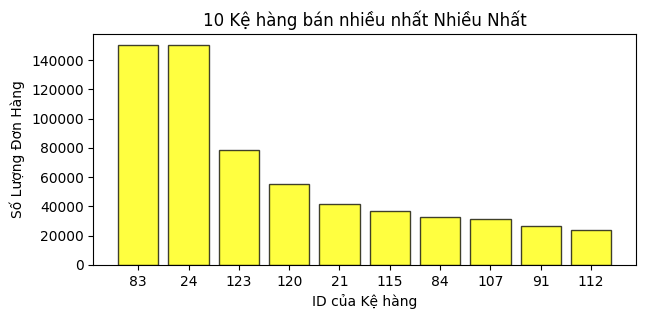

In [24]:
plt.figure(figsize = (7,3))
plt.bar(x=range(10), height=top10_aisle_count, 
        color='yellow', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.title('10 Kệ hàng bán nhiều nhất Nhiều Nhất')
plt.xlabel('ID của Kệ hàng')
plt.ylabel('Số Lượng Đơn Hàng')
plt.xticks(range(10), top10_aisle_id, rotation='horizontal')
plt.show()